# ***PROJECT-B3TA***
## **notebook 02 | Pre-Processing and In Depth EDA**  

---

### 1. **Dataset Loading**

**Imports.**

In [1]:
import numpy as np
import pandas as pd
## Pandas has a depedency on NumPy so loads automatically but best practice to load full NumPy package
print(f"Numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = 'notebook'

# sklearn
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
print(f"skLearn version: {sk.__version__}")

# scipy
import scipy
from scipy.stats import norm

# statsmodels
import statsmodels.api as sm

# b3ta functions
import b3tafunc as b3


Numpy version: 1.24.3
pandas version: 2.0.3
skLearn version: 0.24.2
Numpy version: 1.24.3
pandas version: 2.0.3
skLearn version: 0.24.2


**Load main dataset.**

In [2]:
df = pd.read_csv("../data/b3ta_df_comp_1.csv")
df.head(3)

Unnamed: 0    artist_name        track_name     genre  year  duration_ms  \
0           0     Jason Mraz   I Won't Give Up  acoustic  2012       240166   
1           1     Jason Mraz  93 Million Miles  acoustic  2012       216387   
2           2  Joshua Hyslop  Do Not Let Me Go  acoustic  2012       158960   

     tempo  time_signature  key   mode  ...  popularity  liveness  \
0  133.406               3    4  Major  ...          68    0.1150   
1  140.182               4    3  Major  ...          50    0.0974   
2  139.832               4    3  Major  ...          57    0.0895   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  \
0         0.694       0.0429          0.000000   0.303    0.139         0.483   
1         0.477       0.0258          0.000014   0.454    0.515         0.572   
2         0.338       0.0323          0.000050   0.234    0.145         0.409   

                 track_id sound_profile  
0  53QF56cjZA9RTuuMZDrSA6    no_profile  
1  1s8tP3jP4GZcyHDsjvw218    no_profile  
2  7BRCa8MPiyuvr2VU3O9W0F    no_profile  

[3 rows x 21 columns]

In [3]:
df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
df.reset_index(inplace=True, drop=True)

In [5]:
df

artist_name                          track_name  \
0                   Jason Mraz                     I Won't Give Up   
1                   Jason Mraz                    93 Million Miles   
2                Joshua Hyslop                    Do Not Let Me Go   
3                 Boyce Avenue                            Fast Car   
4                 Andrew Belle                    Sky's Still Blue   
...                        ...                                 ...   
1160373  Red Hot Chili Peppers                     Californication   
1160374        Vampire Weekend                  California English   
1160375   A Tribe Called Quest      I Left My Wallet in El Segundo   
1160376           Tony Bennett  (I Left My Heart) In San Francisco   
1160377           Led Zeppelin      Going to California - Remaster   

                     genre  year  duration_ms    tempo  time_signature  key  \
0                 acoustic  2012       240166  133.406               3    4   
1                 acoustic  2012       216387  140.182               4    3   
2                 acoustic  2012       158960  139.832               4    3   
3                 acoustic  2012       304293  204.961               4   10   
4                 acoustic  2012       244320  171.864               4    6   
...                    ...   ...          ...      ...             ...  ...   
1160373   alternative rock  1999       329733   96.483               4    9   
1160374        baroque pop  2010       150240  164.464               4    0   
1160375  conscious hip hop  1990       246827   99.032               4    7   
1160376    adult standards  1962       170960  128.065               4    0   
1160377         album rock  1971       212161   78.044               4    2   

          mode  loudness  popularity  liveness  acousticness  speechiness  \
0        Major   -10.058          68    0.1150        0.6940       0.0429   
1        Major   -10.286          50    0.0974        0.4770       0.0258   
2        Major   -13.711          57    0.0895        0.3380       0.0323   
3        Major    -9.845          58    0.0797        0.8070       0.0363   
4        Minor    -5.419          54    0.1100        0.0726       0.0302   
...        ...       ...         ...       ...           ...          ...   
1160373  Minor    -2.788          84    0.1270        0.0021       0.0270   
1160374  Major    -8.334           0    0.3850        0.0827       0.3210   
1160375  Major    -6.481          49    0.0866        0.3830       0.2380   
1160376  Major   -17.583          60    0.1690        0.9550       0.0332   
1160377  Major   -15.913          71    0.0867        0.9430       0.0333   

         instrumentalness  energy  valence  danceability  \
0                0.000000   0.303    0.139         0.483   
1                0.000014   0.454    0.515         0.572   
2                0.000050   0.234    0.145         0.409   
3                0.000000   0.251    0.508         0.392   
4                0.019300   0.791    0.217         0.430   
...                   ...     ...      ...           ...   
1160373          0.001650   0.767    0.328         0.592   
1160374          0.000005   0.642    0.646         0.615   
1160375          0.000000   0.825    0.881         0.817   
1160376          0.000004   0.078    0.125         0.313   
1160377          0.045000   0.265    0.522         0.503   

                       track_id sound_profile  
0        53QF56cjZA9RTuuMZDrSA6    no_profile  
1        1s8tP3jP4GZcyHDsjvw218    no_profile  
2        7BRCa8MPiyuvr2VU3O9W0F    no_profile  
3        63wsZUhUZLlh1OsyrZq7sz    no_profile  
4        6nXIYClvJAfi6ujLiKqEq8    no_profile  
...                         ...           ...  
1160373  48UPSzbZjgc449aqz8bxox            la  
1160374  616yWUonrccM3bckt85yC5            la  
1160375  15Xdlu0QaiEy3YFTf4xpUA            la  
1160376  1bYItjcPRtxZs6Ir71O5RB            la  
1160377  70gbuMqwNBE2Y5rkQJE9By            la  

[11603

In [6]:
df.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
sound_profile       0
dtype: int64

In [7]:
df.shape

(1160378, 20)

**Load soundprofile indexes.**
- lon_snd_index (60 tracks)
- man_snd_index (50 tracks)
- bza_snd_index (432 tracks)
- ber_snd_index (200 tracks)
- kng_snd_index (76 tracks)
- nyc_snd_index (50 tracks)
- la_snd_index (66 tracks)
- comb_snd_index (934 tracks)


In [8]:
lon_snd_index_df = pd.read_csv("../data/b3ta_lon_snd_index.csv", index_col=0)
man_snd_index_df = pd.read_csv("../data/b3ta_man_snd_index.csv", index_col=0)
bza_snd_index_df = pd.read_csv("../data/b3ta_bza_snd_index.csv", index_col=0)
ber_snd_index_df = pd.read_csv("../data/b3ta_ber_snd_index.csv", index_col=0)
kng_snd_index_df = pd.read_csv("../data/b3ta_kng_snd_index.csv", index_col=0)
nyc_snd_index_df = pd.read_csv("../data/b3ta_nyc_snd_index.csv", index_col=0)
la_snd_index_df = pd.read_csv("../data/b3ta_la_snd_index.csv", index_col=0)
comb_snd_index_df = pd.read_csv("../data/b3ta_combined_snd_index.csv", index_col=0)

In [9]:
lon_snd_index = list(lon_snd_index_df['london'])
man_snd_index = list(man_snd_index_df['manchester'])
bza_snd_index = list(bza_snd_index_df['ibiza'])
ber_snd_index = list(ber_snd_index_df['berlin'])
kng_snd_index = list(kng_snd_index_df['kingston'])
nyc_snd_index = list(nyc_snd_index_df['nyc'])
la_snd_index = list(la_snd_index_df['la'])
comb_snd_index = list(comb_snd_index_df['combined_sp'])

In [10]:
# Check correct length
print(len(lon_snd_index))
print(len(man_snd_index))
print(len(bza_snd_index))
print(len(ber_snd_index))
print(len(kng_snd_index))
print(len(nyc_snd_index))
print(len(la_snd_index))
print(len(comb_snd_index))

60
50
432
200
76
50
66
934


**Create sound profile dfs**.

In [11]:
london_snd = df.loc[lon_snd_index]
manchester_snd = df.loc[man_snd_index]
ibiza_snd = df.loc[bza_snd_index]
berlin_snd = df.loc[ber_snd_index]
kingston_snd = df.loc[kng_snd_index]
nyc_snd = df.loc[nyc_snd_index]
la_sn = df.loc[la_snd_index]
combined_snd = df.loc[comb_snd_index]

In [12]:
manchester_snd = df.loc[man_snd_index]
ibiza_snd = df.loc[bza_snd_index]
berlin_snd = df.loc[ber_snd_index]
kingston_snd = df.loc[kng_snd_index]
nyc_snd = df.loc[nyc_snd_index]
la_snd = df.loc[la_snd_index]
combined_snd = df.loc[comb_snd_index]

In [13]:
print(len(london_snd))
print(len(manchester_snd))
print(len(ibiza_snd))
print(len(berlin_snd))
print(len(kingston_snd))
print(len(nyc_snd))
print(len(la_snd))
print(len(combined_snd))

60
50
432
200
76
50
66
934


### *Dataset Summary*;

**Dataframes**
- df (1,160,378 tracks)
- london_snd (60 tracks)
- manchester_snd (50 tracks)
- ibiza_snd (432 tracks)
- berlin_snd (200 tracks)
- kingston_snd (76 tracks)
- nyc_snd (50 tracks)
- la_sn (66 tracks)
- combined_snd (934 tracks)

**Main DF (df) Index lists for sound profiles**
- lon_snd_index
- man_snd_index
- bza_snd_index
- ber_snd_index
- kng_snd_index
- nyc_snd_index
- la_snd_index
- comb_snd_index

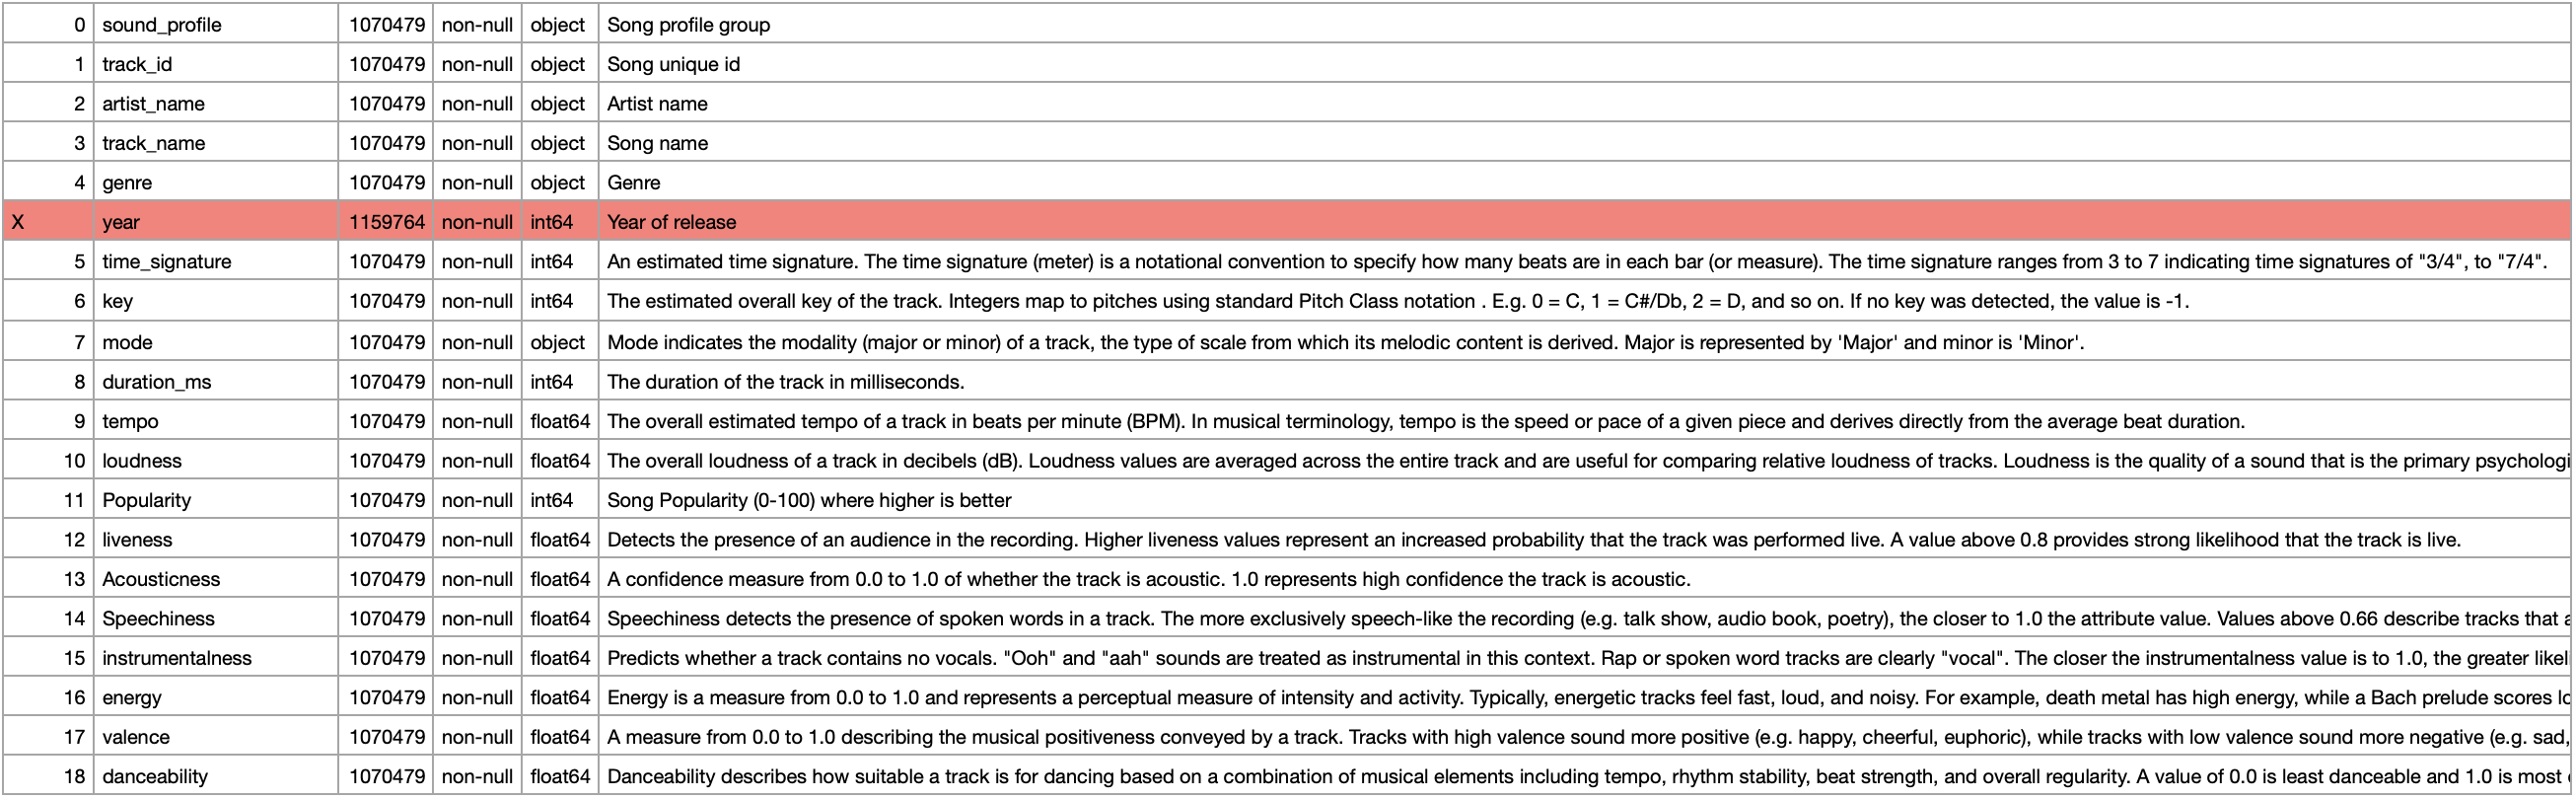

### 2. **Further Cleaning**

#### Reorder columns, cols that won't be fed into the model at the front.

In [14]:
df = df.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre',
                         'year',
                         'time_signature',
                         'key',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'popularity',
                         'liveness',
                         'acousticness',
                         'speechiness',
                         'instrumentalness',
                         'energy',
                         'valence',
                         'danceability'
                        ])

df.head(1)

sound_profile                track_id artist_name       track_name  \
0    no_profile  53QF56cjZA9RTuuMZDrSA6  Jason Mraz  I Won't Give Up   

      genre  year  time_signature  key   mode  duration_ms    tempo  loudness  \
0  acoustic  2012               3    4  Major       240166  133.406   -10.058   

   popularity  liveness  acousticness  speechiness  instrumentalness  energy  \
0          68     0.115         0.694       0.0429               0.0   0.303   

   valence  danceability  
0    0.139         0.483

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   year              1160378 non-null  int64  
 6   time_signature    1160378 non-null  int64  
 7   key               1160378 non-null  int64  
 8   mode              1160378 non-null  object 
 9   duration_ms       1160378 non-null  int64  
 10  tempo             1160378 non-null  float64
 11  loudness          1160378 non-null  float64
 12  popularity        1160378 non-null  int64  
 13  liveness          1160378 non-null  float64
 14  acousticness      1160378 non-null  float64
 15  speechiness       1160378 non-null  float64
 16  

#### Genres.
- Here we have 234 genres in total, this is a huge number. First we'll manually remap to a more realistic selection before one hot encoding during preprocessing. Whilst this may be time-consuming to do manually, this is an important task given the close relationship genre has to location.
- Here we're able to reduce columns down to a total of 56.

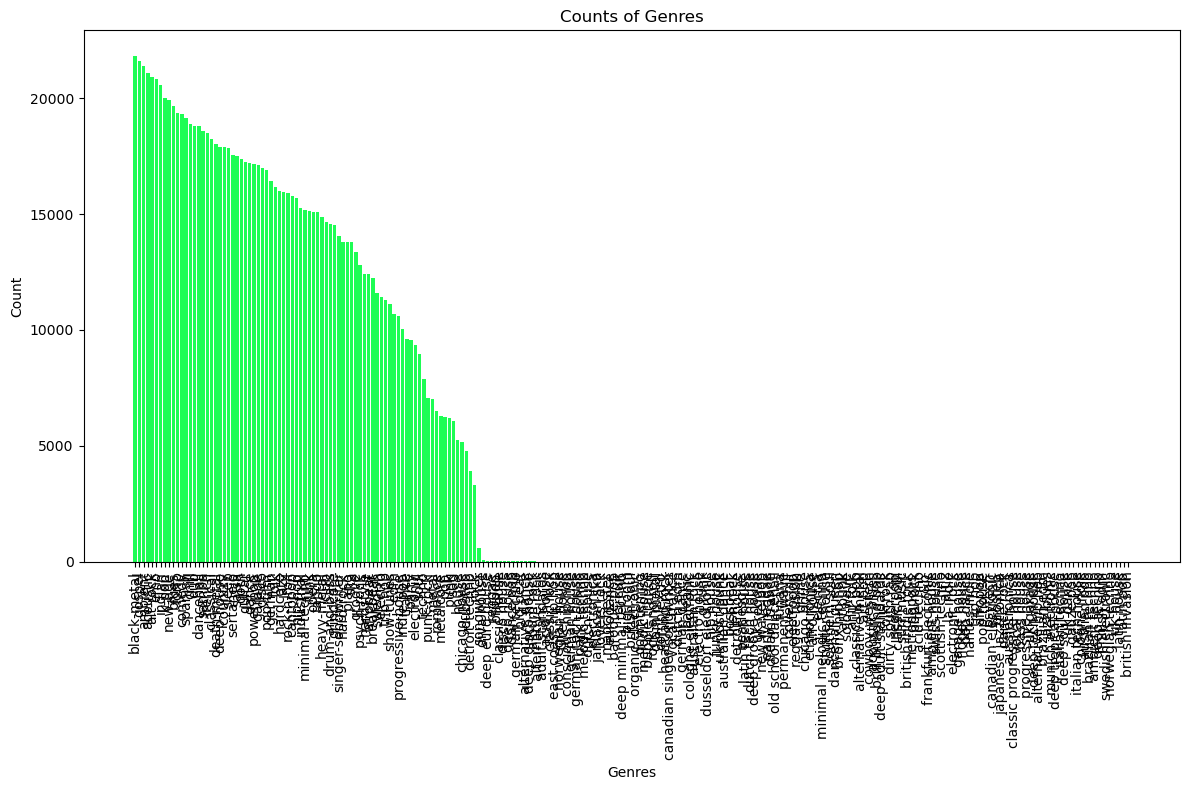

In [16]:
genre_counts = df['genre'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df['genre'].value_counts())

genre
black-metal                   21837
gospel                        21621
ambient                       21389
acoustic                      21097
alt-rock                      20919
emo                           20845
indian                        20583
k-pop                         20004
new-age                       19911
blues                         19685
forro                         19379
comedy                        19334
spanish                       19158
chill                         18906
dub                           18803
dancehall                     18789
samba                         18599
french                        18519
classical                     18259
death-metal                   18038
deep-house                    17896
country                       17883
sleep                         17851
sertanejo                     17566
salsa                         17501
goth                          17381
guitar                        17266
dance                 

In [18]:
# First pass
df['genre_map_v1'] = df['genre'].map({
    'gospel' : 'gospel',
    'alt-rock' : 'alt-rock',
    'acoustic' : 'acoustic',
    'black-metal' : 'black-metal',
    'k-pop' : 'k-pop',
    'emo' : 'emo',
    'blues' : 'blues',
    'new-age' : 'new-age',
    'spanish' : 'spanish',
    'forro' : 'forro',
    'dub' : 'dub',
    'dancehall' : 'dancehall',
    'samba' : 'samba',
    'ambient' : 'ambient',
    'country' : 'country',
    'deep-house' : 'deep-house',
    'sertanejo' : 'sertanejo',
    'salsa' : 'salsa',
    'indian' : 'indian',
    'french' : 'french',
    'dance' : 'dance',
    'goth' : 'goth',
    'chill' : 'chill',
    'disco' : 'disco',
    'death-metal' : 'death-metal',
    'pop-film' : 'pop',
    'cantopop' : 'cantopop',
    'folk' : 'folk',
    'guitar' : 'guitar',
    'power-pop' : 'pop',
    'garage' : 'garage',
    'hip-hop' : 'hip-hop',
    'minimal-techno' : 'minimal-techno',
    'tango' : 'tango',
    'german' : 'german',
    'jazz' : 'jazz',
    'industrial' : 'industrial',
    'rock-n-roll' : 'rock',
    'heavy-metal' : 'heavy-metal',
    'drum-and-bass' : 'drum-and-bass',
    'funk' : 'funk',
    'classical' : 'classical',
    'hardcore' : 'hardcore',
    'singer-songwriter' : 'singer-songwriter',
    'comedy' : 'comedy',
    'hard-rock' : 'hard-rock',
    'sleep' : 'sleep',
    'club' : 'club',
    'opera' : 'opera',
    'groove' : 'groove',
    'ska' : 'ska',
    'piano' : 'piano',
    'hardstyle' : 'hardstyle',
    'breakbeat' : 'breakbeat',
    'afrobeat' : 'afrobeat',
    'psych-rock' : 'psych-rock',
    'swedish' : 'swedish',
    'electro' : 'electro',
    'trip-hop' : 'trip-hop',
    'edm' : 'edm',
    'progressive-house' : 'progressive-house',
    'show-tunes' : 'other',
    'indie-pop' : 'indie',
    'trance' : 'trance',
    'electronic' : 'electronic',
    'soul' : 'soul',
    'party' : 'party',
    'techno' : 'techno',
    'metal' : 'metal',
    'punk-rock' : 'punk',
    'romance' : 'romance',
    'pop' : 'pop',
    'metalcore' : 'metal',
    'grindcore' : 'grindcore',
    'punk' : 'punk',
    'sad' : 'sad',
    'house' : 'house',
    'chicago-house' : 'chicago-house',
    'dubstep' : 'dubstep',
    'detroit-techno' : 'detroit-techno',
    'rock' : 'rock',
    'songwriter' : 'singer-songwriter',
    'diva house' : 'house',
    'deep euro house' : 'house',
    'reggae' : 'reggae',
    'britpop' : 'indie',
    'classic house' : 'house',
    'disco house' : 'house',
    'deep house' : 'deep house',
    'dance pop' : 'dance',
    'alternative dance' : 'dance',
    'album rock' : 'rock',
    'german techno' : 'techno',
    'big beat' : 'dance',
    'deep disco house' : 'house',
    'alternative rock' : 'alt-rock',
    'adult standards' : 'other',
    'classic rock' : 'rock',
    'acid house' : 'house',
    'east coast hip hop' : 'hip-hop',
    'norwegian house' : 'house',
    'filter house' : 'house',
    'german tech house' : 'tech-house',
    'german house' : 'house',
    'conscious hip hop' : 'hip-hop',
    'dutch house' : 'house',
    'dark techno' : 'techno',
    'melodic techno' : 'techno',
    'lovers rock' : 'rock',
    'baroque pop' : 'pop',
    'jamaican ska' : 'ska',
    'eurodance' : 'dance',
    'electronica' : 'electronica',
    'madchester' : 'house',
    'melodic house' : 'house',
    'deep minimal techno' : 'techno',
    'organic electronic' : 'electronic',
    'circuit' : 'other',
    'big room' : 'edm',
    'downtempo' : 'ambient',
    'bubble trance' : 'trance',
    'british soul' : 'soul',
    'australian rock' : 'rock',
    'dutch edm' : 'edm',
    'complextro' : 'other',
    'g funk' : 'funk',
    'vocal trance' : 'trance',
    'canadian singer-songwriter' : 'singer-songwriter',
    'balearic' : 'house',
    'rock-and-roll' : 'rock',
    'electro house' : 'house',
    'heartland rock' : 'rock',
    'german dance' : 'dance',
    'glam metal' : 'metal',
    'cologne electronic' : 'electronic',
    'dusseldorf electronic' : 'electronic',
    'hip house' : 'house',
    'funky house' : 'house',
    'latin tech house' : 'tech-house',
    'australian dance' : 'dance',
    'bossbeat' : 'other',
    'irish rock' : 'rock',
    'uk post-punk' : 'punk',
    'beatlesque' : 'rock',
    'detroit house' : 'house',
    'dutch tech house' : 'tech-house',
    'deep groove house' : 'deep house',
    'early reggae' : 'reggae',
    'electropop' : 'electro',
    'old school dancehall' : 'dancehall',
    'new wave pop' : 'pop',
    'funana' : 'other',
    'dream trance' : 'trance',
    'uk reggae' : 'reggae',
    'coverchill' : 'other',
    'reggae fusion' : 'reggae',
    'dancehall queen' : 'dancehall',
    'permanent wave' : 'other',
    'ethnotronica' : 'other',
    'afro house' : 'house',
    'electra' : 'electro',
    'minimal melodic techno' : 'techno',
    'stutter house' : 'house',
    'southern soul' : 'soul',
    'frankfurt electronic' : 'electronic',
    'chicago house' : 'chicago-house',
    'r&b' : 'r&b',
    'grime' : 'grime',
    'folk rock' : 'folk',
    'anti-folk' : 'other',
    'classic uk pop' : 'pop',
    'alternative metal' : 'metal',
    'art pop' : 'pop',
    'cowboy western' : 'other',
    'acoustic blues' : 'blues',
    'brill building pop' : 'pop',
    'solo wave' : 'other',
    'nederpop' : 'pop',
    'art punk' : 'punk',
    'classic soul' : 'soul',
    'surf music' : 'rock',
    'british indie rock' : 'indie',
    'metropopolis' : 'other',
    'pop rock' : 'pop',
    'bronx hip hop' : 'hip-hop',
    'swiss house' : 'house',
    'dirty south rap' : 'hip-hop',
    'acid techno' : 'techno',
    'munich electronic' : 'electronic',
    'psytech' : 'other',
    'uk garage' : 'garage',
    'la indie' : 'indie',
    'electronic rock' : 'rock',
    'garage house' : 'house',
    'fidget house' : 'house',
    'pop dance' : 'pop',
    'nantes indie' : 'indie',
    'trip hop' : 'trip-hop',
    'afropop' : 'afrobeat',
    'scottish techno' : 'techno',
    'pop house' : 'pop',
    'canadian electronic' : 'electronic',
    'brostep' : 'dubstep',
    'japanese jazztronica' : 'other',
    'dance rock' : 'rock',
    'aussietronica' : 'other',
    'classic progressive house' : 'progressive-house',
    'vocal house' : 'house',
    'bass house' : 'house',
    'progressive house' : 'progressive-house',
    'alt z' : 'other',
    'deep tech house' : 'tech-house',
    'ambient house' : 'ambient',
    'alternative hip hop' : 'hip-hop',
    'jazz blues' : 'jazz',
    'deep tropical house' : 'house',
    'italian techno' : 'techno',
    'deep soul house' : 'house',
    'uk dance' : 'dance',
    'gauze pop' : 'pop',
    'italian tech house' : 'tech-house',
    'cologne indie' : 'indie',
    'austrian pop' : 'pop',
    'brazilian techno' : 'techno',
    'ambient techno' : 'techno',
    'deep techno' : 'techno',
    'finnish edm' : 'edm',
    'swedish electronic' : 'electronic',
    'norwegian techno' : 'techno',
    'uk house' : 'house',
    'latin house' : 'house',
    'latin pop' : 'pop',
    'brazilian edm' : 'edm',
    'british invasion' : 'rock',
})

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df['genre_map_v1'].value_counts())

genre_map_v1
pop                  40318
black-metal          21837
gospel               21621
ambient              21393
acoustic             21097
alt-rock             20928
emo                  20845
indian               20583
k-pop                20004
new-age              19911
blues                19686
forro                19379
comedy               19334
rock                 19246
spanish              19158
chill                18906
dub                  18803
dancehall            18791
samba                18599
french               18519
classical            18259
death-metal          18038
deep-house           17896
country              17883
sleep                17851
sertanejo            17566
salsa                17501
goth                 17381
guitar               17266
dance                17253
garage               17124
disco                16992
german               16417
folk                 16172
hardcore             15993
jazz                 15944
cantopop       

In [20]:
df['genre_map_v1'].value_counts().count()

82

In [21]:
df['genre_map_v2'] = df['genre_map_v1'].map({
    'pop' : 'pop',
    'gospel' : 'gospel',
    'alt-rock' : 'alt-rock',
    'acoustic' : 'acoustic',
    'black-metal' : 'black-metal',
    'k-pop' : 'k-pop',
    'emo' : 'emo',
    'blues' : 'blues',
    'new-age' : 'new-age',
    'spanish' : 'spanish',
    'forro' : 'forro',
    'dub' : 'dub',
    'dancehall' : 'dancehall',
    'samba' : 'samba',
    'ambient' : 'ambient',
    'rock' : 'rock',
    'country' : 'country',
    'deep-house' : 'deep-house',
    'sertanejo' : 'sertanejo',
    'salsa' : 'salsa',
    'indian' : 'indian',
    'french' : 'french',
    'dance' : 'dance',
    'goth' : 'goth',
    'chill' : 'ambient',
    'disco' : 'disco',
    'death-metal' : 'metal',
    'cantopop' : 'cantopop',
    'folk' : 'folk',
    'guitar' : 'rock',
    'garage' : 'garage',
    'hip-hop' : 'hip-hop',
    'minimal-techno' : 'techno',
    'tango' : 'tango',
    'german' : 'german',
    'jazz' : 'jazz',
    'industrial' : 'industrial',
    'heavy-metal' : 'metal',
    'drum-and-bass' : 'drum-and-bass',
    'funk' : 'funk&soul',
    'classical' : 'classical',
    'singer-songwriter' : 'singer-songwriter',
    'hardcore' : 'hardcore',
    'comedy' : 'other',
    'hard-rock' : 'metal',
    'sleep' : 'sleep',
    'club' : 'dance',
    'opera' : 'classical',
    'groove' : 'other',
    'metal' : 'metal',
    'ska' : 'reggae&ska',
    'piano' : 'piano',
    'punk' : 'punk',
    'hardstyle' : 'hardcore',
    'breakbeat' : 'breakbeat',
    'afrobeat' : 'afrobeat',
    'psych-rock' : 'rock',
    'swedish' : 'other',
    'electro' : 'electro',
    'trip-hop' : 'trip-hop',
    'edm' : 'edm',
    'progressive-house' : 'house',
    'other' : 'other',
    'indie' : 'indie',
    'trance' : 'trance',
    'electronic' : 'electronic',
    'soul' : 'funk&soul',
    'party' : 'party',
    'techno' : 'techno',
    'romance' : 'other',
    'grindcore' : 'metal',
    'sad' : 'other',
    'house' : 'house',
    'chicago-house' : 'house',
    'dubstep' : 'dupstep',
    'detroit-techno' : 'techno',
    'reggae' : 'reggae&ska',
    'deep house' : 'deep-house',
    'tech-house' : 'techno',
    'electronica' : 'electronic',
    'grime' : 'hip-hop',
    'r&b' : 'funk&soul'
})

In [22]:
df['genre_map_v2'].value_counts()

genre_map_v2
metal                74499
other                68048
rock                 49301
pop                  40318
ambient              40299
classical            33338
dance                31931
hardcore             28413
techno               27059
funk&soul            24118
black-metal          21837
gospel               21621
house                21233
acoustic             21097
alt-rock             20928
emo                  20845
indian               20583
k-pop                20004
new-age              19911
blues                19686
forro                19379
spanish              19158
dub                  18803
dancehall            18791
samba                18599
french               18519
deep-house           17914
country              17883
sleep                17851
sertanejo            17566
salsa                17501
goth                 17381
garage               17124
disco                16992
german               16417
folk                 16172
jazz           

In [23]:
df['genre_map_v2'].value_counts().count()

56

In [24]:
# Let's check how this has affected our histogram
genre_counts = df['genre_map_v2'].value_counts()
genre_counts_nmlz = df['genre_map_v2'].value_counts(normalize=True)
genre_counts_nmlz = round(genre_counts_nmlz * 100, 2)

# Calculate total count
total_count = genre_counts.sum()

# Calculate percentage of total count for each genre
percentages = (genre_counts / total_count) * 100

# genres by counts 
fig = go.Figure()

genres = genre_counts.index
counts = genre_counts.values

# Generate hover text with count and percentage
hover_text = [f'Count: {count}<br>Percentage of Total: {percent:.2f}%' 
              for count, percent in zip(counts, percentages)]

genre_cnts = go.Bar(
    x=genres,
    y=counts,
    name='Genre',
    marker_color="#1DFD54",
    opacity=0.9,
    hovertext=hover_text  # Set hover text
)

fig.add_trace(genre_cnts)

chart_layout = go.Layout(
    width=2000,
    height=600,
    title='Genres',
    xaxis_title='Genre',
    yaxis_title='Count'
)

fig.update_layout(chart_layout)

fig.show()


In [25]:
df['genre_map_v2'].value_counts()

genre_map_v2
metal                74499
other                68048
rock                 49301
pop                  40318
ambient              40299
classical            33338
dance                31931
hardcore             28413
techno               27059
funk&soul            24118
black-metal          21837
gospel               21621
house                21233
acoustic             21097
alt-rock             20928
emo                  20845
indian               20583
k-pop                20004
new-age              19911
blues                19686
forro                19379
spanish              19158
dub                  18803
dancehall            18791
samba                18599
french               18519
deep-house           17914
country              17883
sleep                17851
sertanejo            17566
salsa                17501
goth                 17381
garage               17124
disco                16992
german               16417
folk                 16172
jazz           

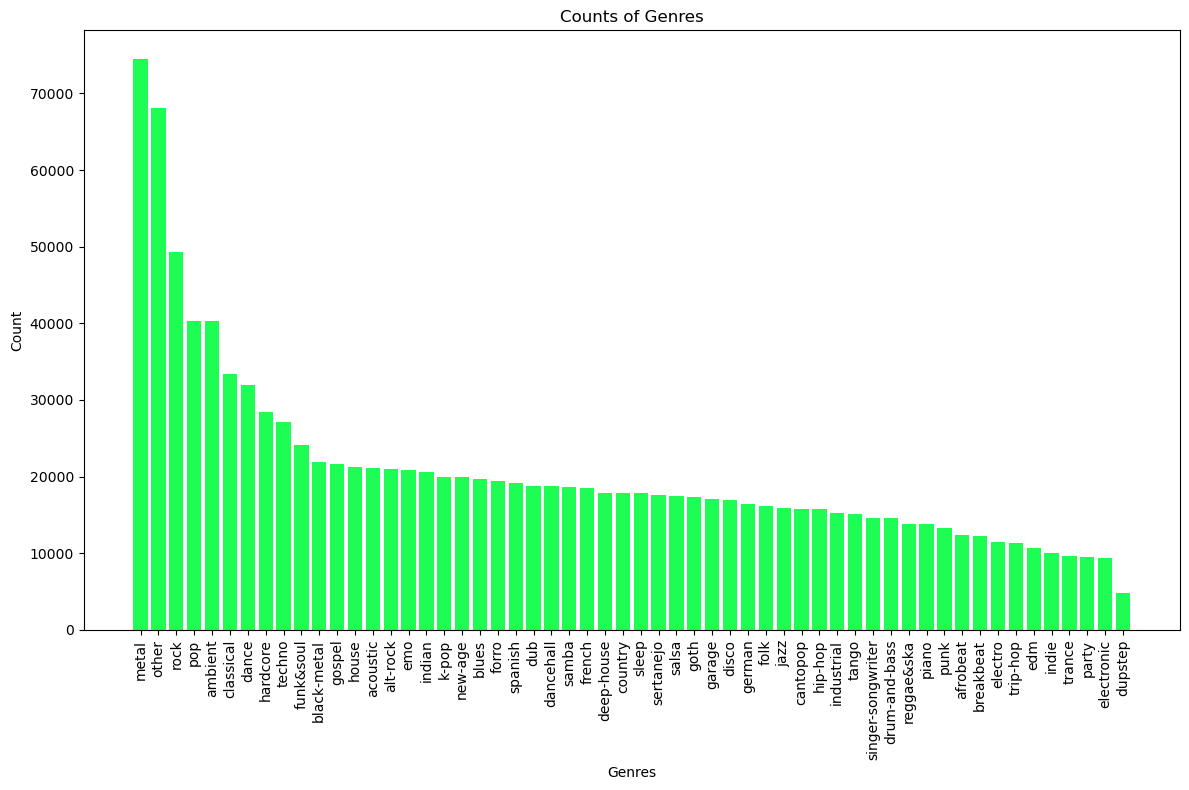

In [26]:
genre_counts = df['genre_map_v2'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   year              1160378 non-null  int64  
 6   time_signature    1160378 non-null  int64  
 7   key               1160378 non-null  int64  
 8   mode              1160378 non-null  object 
 9   duration_ms       1160378 non-null  int64  
 10  tempo             1160378 non-null  float64
 11  loudness          1160378 non-null  float64
 12  popularity        1160378 non-null  int64  
 13  liveness          1160378 non-null  float64
 14  acousticness      1160378 non-null  float64
 15  speechiness       1160378 non-null  float64
 16  

#### Year - remove.

- As we previously noted (01-b3-loading-cleaning-initial-eda) with the exception of our sound profile tracks, the maintain database only includes tracks from 2000 onwards.
- We've also no clarity on what this year relates to, the inclusion of Johann Sebastian Bach & Elvis Presley in our column of artists confirms this is not production date (for the main database tracks at least. Given the lack of real meaning we will drop this column.

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df["year"].value_counts())

year
2018    56589
2017    56286
2019    55803
2020    55070
2012    54821
2022    53698
2021    53574
2013    53240
2014    53201
2015    51632
2008    47448
2010    46894
2009    46885
2011    46473
2007    46021
2006    45480
2000    44042
2005    43784
2004    43395
2003    42378
2001    42362
2002    42116
2016    40313
2023    38659
1999       18
1997       16
1994       14
1998       14
1995       13
1990       11
1992       11
1976       10
1993       10
1996        9
1972        6
1978        6
1989        6
1991        6
1988        5
1987        5
1980        5
1970        5
1983        4
1982        4
1986        4
1984        3
1981        3
1962        3
1966        3
1977        2
1979        2
1959        2
1969        2
1975        2
1971        2
1985        1
1956        1
1974        1
1964        1
1958        1
1968        1
1967        1
1965        1
Name: count, dtype: int64


In [29]:
df.drop(columns="year", inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   time_signature    1160378 non-null  int64  
 6   key               1160378 non-null  int64  
 7   mode              1160378 non-null  object 
 8   duration_ms       1160378 non-null  int64  
 9   tempo             1160378 non-null  float64
 10  loudness          1160378 non-null  float64
 11  popularity        1160378 non-null  int64  
 12  liveness          1160378 non-null  float64
 13  acousticness      1160378 non-null  float64
 14  speechiness       1160378 non-null  float64
 15  instrumentalness  1160378 non-null  float64
 16  

#### Time Signature - remove.
- As we saw as part of our initial EDA, the vast majority of music on Spotify is unsurpisingly in 4/4 and whilst time signature is likely to have a close relationship with location (similar types of sound / genre are likely to emmenate from the same place), unfortunately the information online and the numbers we have in our dataset don't seem to correlate. The data dict description explains that; *'the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".'*, however unfortunately that doesn't give us any more understanding of how that relates to our numbers. 3 = 3/4 and 4 = 4/4 would make sense as these tend to be the more common signatures in modern popular music but how 0, 1, 2 and 5 then relate to the remaining signatures isn't clear. As a result we shall drop this column.

In [31]:
df['time_signature'].unique()

array([3, 4, 5, 1, 0])

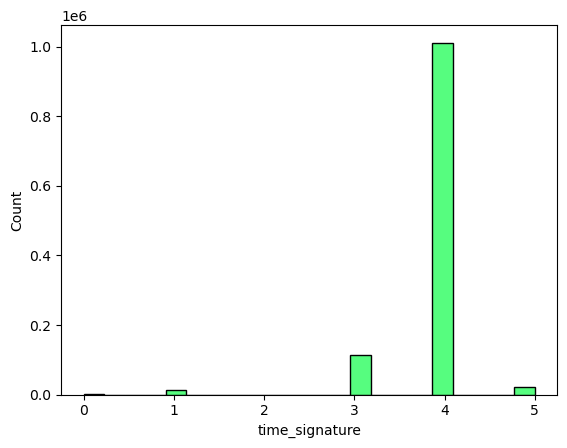

In [32]:
sns.histplot(data=df, x=df['time_signature'], color='#1DFD54');

In [33]:
df.drop(columns='time_signature', inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   key               1160378 non-null  int64  
 6   mode              1160378 non-null  object 
 7   duration_ms       1160378 non-null  int64  
 8   tempo             1160378 non-null  float64
 9   loudness          1160378 non-null  float64
 10  popularity        1160378 non-null  int64  
 11  liveness          1160378 non-null  float64
 12  acousticness      1160378 non-null  float64
 13  speechiness       1160378 non-null  float64
 14  instrumentalness  1160378 non-null  float64
 15  energy            1160378 non-null  float64
 16  

#### Key.
- Here we have a numerical value but will need to convert to categorical then hotone encode to avoid implying order (whilst there is order, no one key is 'greater' than another). Let's map first then encode during preprocessing.
    - 0 : C
    - 1 : C#/Db
    - 2 : D
    - 3 : D#/Eb
    - 4 : E
    - 5 : F
    - 6 : F#/Gb
    - 7 : G
    - 8 : G#/Ab
    - 9 : A
    - 10 : A#/Bb
    - 11 : B

In [35]:
df["key"].value_counts()

key
7     139687
0     130136
2     123747
9     119375
1     112862
5      94079
4      91214
11     91015
6      76174
10     76087
8      70249
3      35753
Name: count, dtype: int64

In [36]:
df['key_map'] = df['key'].map({
    0 : 'C',
    1 : 'C#/Db',
    2 : 'D',
    3 : 'D#/Eb',
    4 : 'E',
    5 : 'F',
    6 : 'F#/Gb',
    7 : 'G',
    8 : 'G#/Ab',
    9 : 'A',
    10 : 'A#/Bb',
    11 : 'B'
})

In [37]:
# Check correct mapping
list(df['key_map'].value_counts()) == list(df["key"].value_counts())

True

In [38]:
# Drop old key column
df.drop(columns="key", inplace=True)

In [39]:
# Reorder cols
df = df.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre',
                         'time_signature',
                         'key_map',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'popularity',
                         'liveness',
                         'acousticness',
                         'speechiness',
                         'instrumentalness',
                         'energy',
                         'valence',
                         'danceability'
                        ])

df.head(1)

sound_profile                track_id artist_name       track_name  \
0    no_profile  53QF56cjZA9RTuuMZDrSA6  Jason Mraz  I Won't Give Up   

      genre  time_signature key_map   mode  duration_ms    tempo  loudness  \
0  acoustic             NaN       E  Major       240166  133.406   -10.058   

   popularity  liveness  acousticness  speechiness  instrumentalness  energy  \
0          68     0.115         0.694       0.0429               0.0   0.303   

   valence  danceability  
0    0.139         0.483

In [40]:
# Rename
df.rename(columns = {'key_map': 'key'}, inplace=True)

In [41]:
# Check updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   time_signature    0 non-null        float64
 6   key               1160378 non-null  object 
 7   mode              1160378 non-null  object 
 8   duration_ms       1160378 non-null  int64  
 9   tempo             1160378 non-null  float64
 10  loudness          1160378 non-null  float64
 11  popularity        1160378 non-null  int64  
 12  liveness          1160378 non-null  float64
 13  acousticness      1160378 non-null  float64
 14  speechiness       1160378 non-null  float64
 15  instrumentalness  1160378 non-null  float64
 16  

#### Mode.

#### Duration (ms) - remove irregular timelengths.
- As we saw during the initial EDA in 01-b3-loading-cleaning-initial-eda, there were some clear outliers that needed to be removed.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   key               1160378 non-null  int64  
 6   mode              1160378 non-null  object 
 7   duration_ms       1160378 non-null  int64  
 8   tempo             1160378 non-null  float64
 9   loudness          1160378 non-null  float64
 10  popularity        1160378 non-null  int64  
 11  liveness          1160378 non-null  float64
 12  acousticness      1160378 non-null  float64
 13  speechiness       1160378 non-null  float64
 14  instrumentalness  1160378 non-null  float64
 15  energy            1160378 non-null  float64
 16  

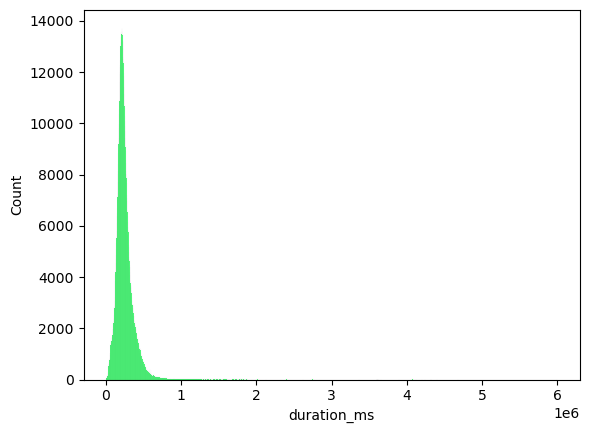

In [49]:
sns.histplot(data=df, x=df['duration_ms'], color='#1DFD54');

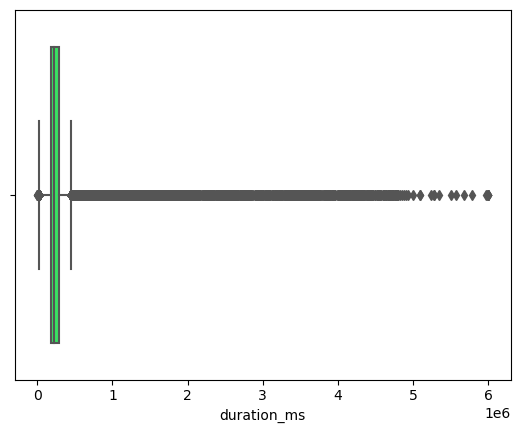

In [50]:
sns.boxplot(data=df, x=df['duration_ms'], color='#1DFD54');

In [51]:
b3.df_numstats(df[['duration_ms']])

DURATION_MS
MEAN: 249584.37
MEDIAN: 225760.0
RANGE: 5998422
IQR: 105835.5
STANDARDDEVIATION: 149408.43
MAX: 6000495
MIN: 2073





In [52]:
# 2.5 std above the mean
249584.37 + (149408.43*2.5)

623105.445

**2.5 standard deviations above the mean is around the 10min mark, let's drop tracks above 10. Let's also drop tracks below 2 min in length. We'll lose minimal tracks from our sound profiles.** (See code blocks below for tracks from our sound profiles to be dropped)

//nb;
- 600000ms = 10mins
- 60000ms = 1min


In [53]:
combined_snd[combined_snd['duration_ms'] < 120000]

artist_name       track_name                 genre  year  \
1104389     Sex Pistols           My Way             punk-rock  2010   
935647           Burial               UK                 dance  2007   
1160335  Connie Stevens  Sixteen Reasons  deep adult standards  2005   

         duration_ms    tempo  time_signature  key   mode  loudness  \
1104389        53213  166.990               4    0  Major    -4.601   
935647        100227  134.839               1   11  Minor   -14.582   
1160335       118133  109.783               3   10  Major    -8.955   

         popularity  liveness  acousticness  speechiness  instrumentalness  \
1104389          20    0.1550      0.000021       0.0471          0.969000   
935647           43    0.0953      0.965000       0.0381          0.939000   
1160335          41    0.1100      0.865000       0.0319          0.000011   

         energy  valence  danceability                track_id sound_profile  
1104389   0.917   0.6900         0.169  4a2bRijLuT8sr9uvDtLh88        london  
935647    0.250   0.0409         0.180  3HfdHW1mSYNOaBmQHVUHpg        london  
1160335   0.406   0.6190         0.339  0oI0ekrSQ3aHiHcMi1B2gK            la

In [54]:
combined_snd[combined_snd['duration_ms'] > 600000]

artist_name              track_name    genre  year  duration_ms  \
328073         NTO  Trauma - Worakls Remix  electro  2018       600122   

          tempo  time_signature  key   mode  loudness  popularity  liveness  \
328073  128.006               4    2  Minor   -10.484          54    0.0863   

        acousticness  speechiness  instrumentalness  energy  valence  \
328073         0.564       0.0409              0.93   0.484    0.136   

        danceability                track_id sound_profile  
328073         0.799  1uXUZfJykefWuwj9VtyxIq        berlin

In [55]:
twomin_lowfilt = df['duration_ms'] < 120000
tenmin_highfilt = df['duration_ms'] > 600000

In [56]:
df[twomin_lowfilt].shape

(74014, 20)

In [57]:
df[tenmin_highfilt].shape

(15885, 20)

In [58]:
df.shape

(1160378, 20)

In [59]:
# Get index of short tracks to drop
twominfilt_drop_index = df[twomin_lowfilt].index

# Drop short tracks
df.drop(index=twominfilt_drop_index, inplace=True)
df.shape

(1086364, 20)

In [60]:
# Check correct no. dropped
1160378-1086364

74014

In [61]:
# Get index of long tracks to drop
tenminfilt_drop_index = df[tenmin_highfilt].index

# Drop long tracks
df.drop(index=tenminfilt_drop_index, inplace=True)
df.shape

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_23690/934447714.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(1070479, 20)

In [62]:
# Check correct no. dropped
1086364-1070479

15885

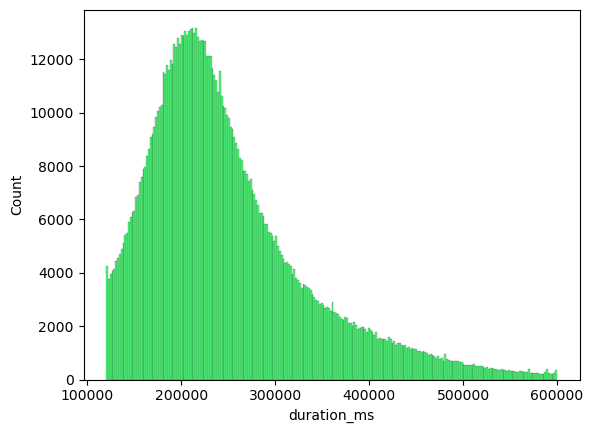

In [63]:
sns.histplot(data=df, x=df['duration_ms'], color='#1DFD54');

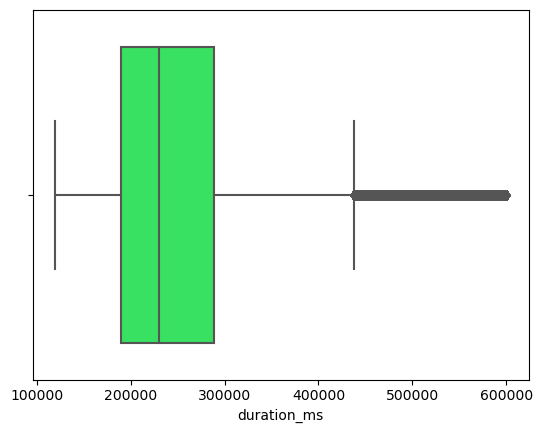

In [64]:
sns.boxplot(data=df, x=df['duration_ms'], color='#1DFD54');

In [65]:
b3.df_numstats(df[['duration_ms']])

DURATION_MS
MEAN: 250051.59
MEDIAN: 230347.0
RANGE: 480000
IQR: 99350.0
STANDARDDEVIATION: 86906.86
MAX: 600000
MIN: 120000





#### Tempo

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070479 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1070479 non-null  object 
 1   track_id          1070479 non-null  object 
 2   artist_name       1070479 non-null  object 
 3   track_name        1070479 non-null  object 
 4   genre             1070479 non-null  object 
 5   key               1070479 non-null  int64  
 6   mode              1070479 non-null  object 
 7   duration_ms       1070479 non-null  int64  
 8   tempo             1070479 non-null  float64
 9   loudness          1070479 non-null  float64
 10  popularity        1070479 non-null  int64  
 11  liveness          1070479 non-null  float64
 12  acousticness      1070479 non-null  float64
 13  speechiness       1070479 non-null  float64
 14  instrumentalness  1070479 non-null  float64
 15  energy            1070479 non-null  float64
 16  valen

In [ ]:
sns.histplot(data=df, x=df['duration_ms'], color='#1DFD54');
sns.boxplot(data=df, x=df['duration_ms'], color='#1DFD54');
b3.df_numstats(df[['duration_ms']])

#### Key.
- Here we have a numerical value but will need to convert to categorical then hotone encode to avoid implying order (whilst there is order, no one key is 'greater' than another). Let's map first then encode during preprocessing.
    - 0 : C
    - 1 : C#/Db
    - 2 : D
    - 3 : D#/Eb
    - 4 : E
    - 5 : F
    - 6 : F#/Gb
    - 7 : G
    - 8 : G#/Ab
    - 9 : A
    - 10 : A#/Bb
    - 11 : B

In [39]:
df['key_map'].value_counts()

key_map
G        129326
C        120121
D        113693
A        110351
C#/Db    103548
F         87146
B         84528
E         84182
A#/Bb     70096
F#/Gb     70096
G#/Ab     64936
D#/Eb     32456
Name: count, dtype: int64

True

sound_profile                track_id artist_name       track_name  \
0    no_profile  53QF56cjZA9RTuuMZDrSA6  Jason Mraz  I Won't Give Up   

      genre  time_signature key_map   mode  duration_ms    tempo  loudness  \
0  acoustic               3       E  Major       240166  133.406   -10.058   

   popularity  liveness  acousticness  speechiness  instrumentalness  energy  \
0          68     0.115         0.694       0.0429               0.0   0.303   

   valence  danceability  
0    0.139         0.483

<class 'pandas.core.frame.DataFrame'>
Index: 1070479 entries, 0 to 1160377
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1070479 non-null  object 
 1   track_id          1070479 non-null  object 
 2   artist_name       1070479 non-null  object 
 3   track_name        1070479 non-null  object 
 4   genre             1070479 non-null  object 
 5   time_signature    1070479 non-null  int64  
 6   key               1070479 non-null  object 
 7   mode              1070479 non-null  object 
 8   duration_ms       1070479 non-null  int64  
 9   tempo             1070479 non-null  float64
 10  loudness          1070479 non-null  float64
 11  popularity        1070479 non-null  int64  
 12  liveness          1070479 non-null  float64
 13  acousticness      1070479 non-null  float64
 14  speechiness       1070479 non-null  float64
 15  instrumentalness  1070479 non-null  float64
 16  energ

In [ ]:
sns.histplot(data=df, x=df['duration_ms'], color='#1DFD54');

In [ ]:
sns.boxplot(data=df, x=df['duration_ms'], color='#1DFD54');

In [ ]:
b3.df_numstats(df[['duration_ms']])

#### Genres.
- Here we have 234 genres in total, this is a huge number. First we'll manually remap to a more realistic selection before one hot encoding during preprocessing. Whilst this may be time-consuming to do manually, this is an important task given the close relationship genre has to location.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1160378 non-null  object 
 1   track_id          1160378 non-null  object 
 2   artist_name       1160378 non-null  object 
 3   track_name        1160378 non-null  object 
 4   genre             1160378 non-null  object 
 5   key               1160378 non-null  int64  
 6   mode              1160378 non-null  object 
 7   duration_ms       1160378 non-null  int64  
 8   tempo             1160378 non-null  float64
 9   loudness          1160378 non-null  float64
 10  popularity        1160378 non-null  int64  
 11  liveness          1160378 non-null  float64
 12  acousticness      1160378 non-null  float64
 13  speechiness       1160378 non-null  float64
 14  instrumentalness  1160378 non-null  float64
 15  energy            1160378 non-null  float64
 16  

### ***SUMMARY OF WORK TO DATE...***
- In th

In [54]:
dfc

NameError: name 'dfc' is not defined

## ***APPENDIX***

In [ ]:
genre_counts = df['genre'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 3. **Preprocessing**

#### Mode.
- Here we'll need to one hot encode

In [296]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
mode = pd.DataFrame(df["mode"])
encoded_y = ohe.fit_transform(mode)
encoded_y

<1070479x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1070479 stored elements in Compressed Sparse Row format>

In [297]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [298]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(mode) for mode in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

Major  Minor
0      1      0
1      1      0
2      1      0
3      1      0
4      0      1

In [247]:
# Add prefix
encoded_df_y.columns = ["mode_"+str(mode) for mode in encoded_df_y.columns]
encoded_df_y.columns

Index(['mode_Major', 'mode_Minor'], dtype='object')

In [248]:
# Add original back in (just to check)
encoded_df_y['mode_c'] = df['Year']

# Show
encoded_df_y.head()

mode_Major  mode_Minor mode_c
0           1           0  Major
1           1           0  Major
2           1           0  Major
3           1           0  Major
4           0           1  Minor

In [251]:
encoded_df_y.drop(columns="mode_c", inplace=True)

In [252]:
encoded_df_y.shape

(1070479, 2)

In [250]:
df.shape

(1070479, 19)

In [258]:
dfc.reset_index(drop=True, inplace=True)

In [259]:
encoded_df_y.reset_index(drop=True, inplace=True)

In [260]:
dfc = pd.concat([df, encoded_df_y], axis = 1)

In [261]:
dfc.

(1070479, 21)

In [262]:
dfc.isna().sum()

sound_profile       0
track_id            0
artist_name         0
track_name          0
genre               0
time_signature      0
key                 0
mode                0
duration_ms         0
tempo               0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
mode_Major          0
mode_Minor          0
dtype: int64

In [267]:
dfc.drop(columns="mode", inplace=True)

In [268]:
dfc.head()

sound_profile                track_id    artist_name        track_name  \
0    no_profile  53QF56cjZA9RTuuMZDrSA6     Jason Mraz   I Won't Give Up   
1    no_profile  1s8tP3jP4GZcyHDsjvw218     Jason Mraz  93 Million Miles   
2    no_profile  7BRCa8MPiyuvr2VU3O9W0F  Joshua Hyslop  Do Not Let Me Go   
3    no_profile  63wsZUhUZLlh1OsyrZq7sz   Boyce Avenue          Fast Car   
4    no_profile  6nXIYClvJAfi6ujLiKqEq8   Andrew Belle  Sky's Still Blue   

      genre  time_signature  key  duration_ms    tempo  loudness  popularity  \
0  acoustic               3    4       240166  133.406   -10.058          68   
1  acoustic               4    3       216387  140.182   -10.286          50   
2  acoustic               4    3       158960  139.832   -13.711          57   
3  acoustic               4   10       304293  204.961    -9.845          58   
4  acoustic               4    6       244320  171.864    -5.419          54   

   liveness  acousticness  speechiness  instrumentalness  energy  valence  \
0    0.1150        0.6940       0.0429          0.000000   0.303    0.139   
1    0.0974        0.4770       0.0258          0.000014   0.454    0.515   
2    0.0895        0.3380       0.0323          0.000050   0.234    0.145   
3    0.0797        0.8070       0.0363          0.000000   0.251    0.508   
4    0.1100        0.0726       0.0302          0.019300   0.791    0.217   

   danceability  mode_Major  mode_Minor  
0         0.483           1           0  
1         0.572           1           0  
2         0.409           1           0  
3         0.392           1           0  
4         0.430           0           1

#### Key.
- Having mapped earlier now we need to one hot encode so as not to imply ordinality. (Whilst there is a type of order it is a loop).

In [308]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
key_map = pd.DataFrame(dfc["key_map"])
encoded_y = ohe.fit_transform(key_map)
encoded_y

<1070479x12 sparse matrix of type '<class 'numpy.float64'>'
	with 1070479 stored elements in Compressed Sparse Row format>

In [309]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [310]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(key_map) for key_map in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

A  A#/Bb  B  C  C#/Db  D  D#/Eb  E  F  F#/Gb  G  G#/Ab
0  0      0  0  0      0  0      0  1  0      0  0      0
1  0      0  0  0      0  0      1  0  0      0  0      0
2  0      0  0  0      0  0      1  0  0      0  0      0
3  0      1  0  0      0  0      0  0  0      0  0      0
4  0      0  0  0      0  0      0  0  0      1  0      0

In [311]:
# Add prefix
encoded_df_y.columns = ["key_"+str(mode) for mode in encoded_df_y.columns]
encoded_df_y.columns


Index(['key_A', 'key_A#/Bb', 'key_B', 'key_C', 'key_C#/Db', 'key_D',
       'key_D#/Eb', 'key_E', 'key_F', 'key_F#/Gb', 'key_G', 'key_G#/Ab'],
      dtype='object')

In [313]:
# Add original back in (just to check)
encoded_df_y['key_map'] = dfc['key_map']

# Show
encoded_df_y.head()

key_A  key_A#/Bb  key_B  key_C  key_C#/Db  key_D  key_D#/Eb  key_E  key_F  \
0      0          0      0      0          0      0          0      1      0   
1      0          0      0      0          0      0          1      0      0   
2      0          0      0      0          0      0          1      0      0   
3      0          1      0      0          0      0          0      0      0   
4      0          0      0      0          0      0          0      0      0   

   key_F#/Gb  key_G  key_G#/Ab key_map  
0          0      0          0       E  
1          0      0          0   D#/Eb  
2          0      0          0   D#/Eb  
3          0      0          0   A#/Bb  
4          1      0          0   F#/Gb

In [314]:
encoded_df_y.drop(columns="key_map", inplace=True)

In [315]:
encoded_df_y.shape

(1070479, 12)

In [316]:
df.shape

(1070479, 19)

In [319]:
dfc.reset_index(drop=True, inplace=True)

In [320]:
encoded_df_y.reset_index(drop=True, inplace=True)

In [321]:
dfc = pd.concat([dfc, encoded_df_y], axis = 1)

In [322]:
dfc.shape

(1070479, 33)

In [323]:
dfc.isna().sum()

sound_profile       0
track_id            0
artist_name         0
track_name          0
genre               0
time_signature      0
key                 0
duration_ms         0
tempo               0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
mode_Major          0
mode_Minor          0
key_map             0
key_A               0
key_A#/Bb           0
key_B               0
key_C               0
key_C#/Db           0
key_D               0
key_D#/Eb           0
key_E               0
key_F               0
key_F#/Gb           0
key_G               0
key_G#/Ab           0
dtype: int64

In [327]:
dfc.drop(columns=["key", "key_map"], inplace=True)

In [329]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070479 entries, 0 to 1070478
Data columns (total 31 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sound_profile     1070479 non-null  object 
 1   track_id          1070479 non-null  object 
 2   artist_name       1070479 non-null  object 
 3   track_name        1070479 non-null  object 
 4   genre             1070479 non-null  object 
 5   time_signature    1070479 non-null  int64  
 6   duration_ms       1070479 non-null  int64  
 7   tempo             1070479 non-null  float64
 8   loudness          1070479 non-null  float64
 9   popularity        1070479 non-null  int64  
 10  liveness          1070479 non-null  float64
 11  acousticness      1070479 non-null  float64
 12  speechiness       1070479 non-null  float64
 13  instrumentalness  1070479 non-null  float64
 14  energy            1070479 non-null  float64
 15  valence           1070479 non-null  float64
 16  

In [328]:
dfc.head()

sound_profile                track_id    artist_name        track_name  \
0    no_profile  53QF56cjZA9RTuuMZDrSA6     Jason Mraz   I Won't Give Up   
1    no_profile  1s8tP3jP4GZcyHDsjvw218     Jason Mraz  93 Million Miles   
2    no_profile  7BRCa8MPiyuvr2VU3O9W0F  Joshua Hyslop  Do Not Let Me Go   
3    no_profile  63wsZUhUZLlh1OsyrZq7sz   Boyce Avenue          Fast Car   
4    no_profile  6nXIYClvJAfi6ujLiKqEq8   Andrew Belle  Sky's Still Blue   

      genre  time_signature  duration_ms    tempo  loudness  popularity  ...  \
0  acoustic               3       240166  133.406   -10.058          68  ...   
1  acoustic               4       216387  140.182   -10.286          50  ...   
2  acoustic               4       158960  139.832   -13.711          57  ...   
3  acoustic               4       304293  204.961    -9.845          58  ...   
4  acoustic               4       244320  171.864    -5.419          54  ...   

   key_B  key_C  key_C#/Db  key_D  key_D#/Eb  key_E  key_F  key_F#/Gb  key_G  \
0      0      0          0      0          0      1      0          0      0   
1      0      0          0      0          1      0      0          0      0   
2      0      0          0      0          1      0      0          0      0   
3      0      0          0      0          0      0      0          0      0   
4      0      0          0      0          0      0      0          1      0   

   key_G#/Ab  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 31 columns]

#### Genres.
- As with key, having sorted out our mappings earlier we now need to one hot endcode.

### 3. **Sound Profile EDA**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
key_map = pd.DataFrame(dfc["key_map"])
encoded_y = ohe.fit_transform(key_map)
encoded_y

In [ ]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y

In [ ]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(key_map) for key_map in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

In [ ]:
# Add prefix
encoded_df_y.columns = ["key_"+str(mode) for mode in encoded_df_y.columns]
encoded_df_y.columns

In [ ]:
# Add original back in (just to check)
encoded_df_y['key_map'] = dfc['key_map']

# Show
encoded_df_y.head()

In [ ]:
encoded_df_y.drop(columns="key_map", inplace=True)
encoded_df_y.shape
df.shape
dfc.reset_index(drop=True, inplace=True)
encoded_df_y.reset_index(drop=True, inplace=True)
dfc = pd.concat([dfc, encoded_df_y], axis = 1)
dfc.shape
dfc.isna().sum()
dfc.drop(columns=["key", "key_map"], inplace=True)
dfc.info()

#### Time signature.

## ***APPENDIX***